In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly as plx
import plotly.graph_objs as go

In [2]:
all_months_data = pd.DataFrame()

files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    df = pd.read_csv('./Sales_Data/'+ file)
    # Concatenate multiple files
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
all_months_data.shape

(186850, 6)

##### Finding Missing Values

In [4]:
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
all_months_data.columns[all_months_data.isna().any()].to_list()

['Order ID',
 'Product',
 'Quantity Ordered',
 'Price Each',
 'Order Date',
 'Purchase Address']

In [6]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# Drop rows with missing values

all_months_data = all_months_data.dropna(how='all')
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [9]:
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'],errors='coerce')

In [10]:
# Find Na in order date
all_months_data['Order Date'].isna().any()

True

In [11]:
all_months_data = all_months_data[all_months_data['Order Date'].notna()]
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


##### Convert Columns to right data types

In [12]:
# Make  int
all_months_data['Order ID'] = pd.to_numeric(all_months_data['Order ID'])
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])

# Make float
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])


In [13]:
all_months_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


### Feature Engineering

##### Create Month Column

In [14]:
all_months_data['Month'] = all_months_data['Order Date'].dt.month
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


##### Create Sales Column

In [15]:
all_months_data['Sale'] = all_months_data['Quantity Ordered']*all_months_data['Price Each']
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Month of best Sales

In [16]:
all_months_data['Sale'].sum()

34492035.97

In [17]:
best_sales_month = all_months_data.groupby('Month').sum()
best_sales_month

,Order ID,Quantity Ordered,Price Each,Sale
Month,,,,
1,1421630798,10903,1.811768e+06,1.822257e+06
2,1871052592,13449,2.188885e+06,2.202022e+06
3,2564810956,17005,2.791208e+06,2.807100e+06
4,3387347100,20558,3.367671e+06,3.390670e+06
5,3345871523,18667,3.135125e+06,3.152607e+06
6,2932976072,15253,2.562026e+06,2.577802e+06
7,3284139576,16072,2.632540e+06,2.647776e+06
8,2899373917,13448,2.230345e+06,2.244468e+06
9,2948726831,13109,2.084992e+06,2.097560e+06


In [18]:
months = [i for i in range(1,13)]

data = [go.Bar(
    x = months,
    y = best_sales_month['Sale']
)]

fig = go.Figure(data = data)
fig.show()

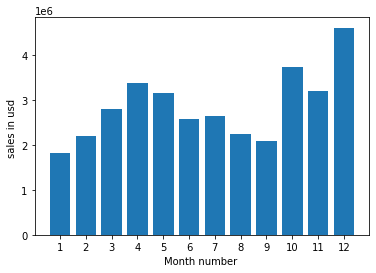

In [19]:
# months = range(1,13)
# plt.bar(months,best_sales_month['Sale'])
# plt.xticks(months)
# plt.ylabel('sales in usd ')
# plt.xlabel('Month number ')
# plt.show()

##### City that sold the most products

In [20]:
all_months_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00


In [21]:
def get_city(address):
    return address.split(',')[1].strip(" ")

def get_state(address):
    return address.split(',')[2].strip(" ")[1]

all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})")
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (X)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (A)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (A)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (A)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (A)


In [23]:
Leading_sales_city = all_months_data.groupby('City').sum()
Leading_sales_city.sort_values('Sale',ascending=False)

,Order ID,Quantity Ordered,Price Each,Month,Sale
City,,,,,
San Francisco (A),10304443952,50239,8.211462e+06,315520,8.262204e+06
Los Angeles (A),6811084693,33289,5.421435e+06,208325,5.452571e+06
New York City (Y),5736333884,27932,4.635371e+06,175741,4.664317e+06
Boston (A),4598265261,22528,3.637410e+06,141112,3.661642e+06
Atlanta (A),3423838407,16602,2.779908e+06,104794,2.795499e+06
Dallas (X),3415643578,16730,2.752628e+06,104620,2.767975e+06
Seattle (A),3406693974,16553,2.733296e+06,104941,2.747755e+06
Portland (R),2305594747,11303,1.860558e+06,70621,1.870732e+06
Austin (X),2280982185,11153,1.809874e+06,69829,1.819582e+06


In [24]:
keys = [city for city, df in all_months_data.groupby(['City'])]

data = [go.Bar(
    x = keys,
    y = Leading_sales_city['Sale']
)]

fig = go.Figure( data = data)
fig.show()

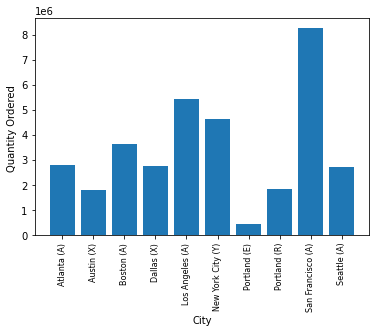

In [27]:
keys = [city for city, df in all_months_data.groupby(['City'])]

plt.bar(keys,Leading_sales_city['Sale'])
plt.ylabel('Quantity Ordered ')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

##### Time to display advertisements to maximize the likelihood of customer's buying product

In [25]:
# Add hour column
all_months_data['Hour'] =   all_months_data['Order Date'].dt.hour
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute
all_months_data['Count'] = 1
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (X),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (A),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (A),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (A),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (A),9,27,1


In [26]:
keys = [pair for pair, df in all_months_data.groupby(['Hour'])]

line = go.Scatter(
    x = keys,
    y = all_months_data.groupby(['Hour']).count()['Count']
)

data = [line]
fig=go.Figure(data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              )

fig.show()

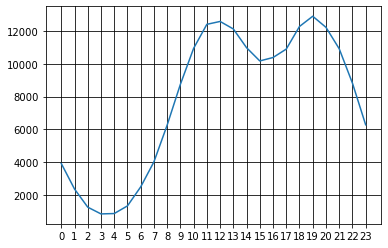

In [96]:
keys = [pair for pair, df in all_months_data.groupby(['Hour'])]

plt.plot(keys,all_months_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid(color='k')
plt.show()

# My recommendation is slightly before 11am or 7pm

#### Products often sold together

In [28]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (X),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (A),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (A),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (A),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (A),9,27,1


In [29]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep = False)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (A),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (A),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (A),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (A),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (A),11,31,1


In [30]:
df['Grouped'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))
df.head()

<ipython-input-30-8a5532fcd218>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hour,Minute,Count,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (A),14,38,1,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (A),14,38,1,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (A),19,42,1,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (A),19,42,1,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (A),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [31]:
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [32]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Most sold product

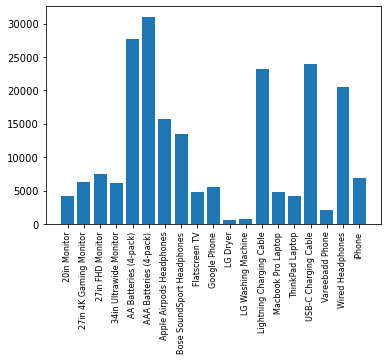

In [33]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


<ipython-input-34-7d593c47521d>:12: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-34-7d593c47521d>:14: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



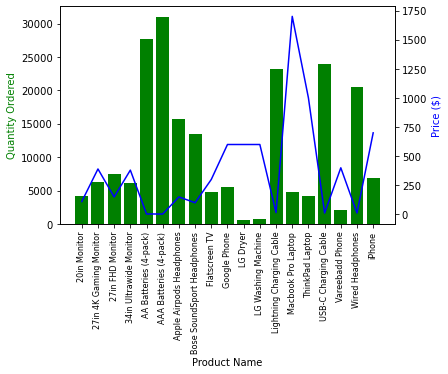

In [34]:
prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()